In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("ValueCo data extract - ENSAE research project.csv")

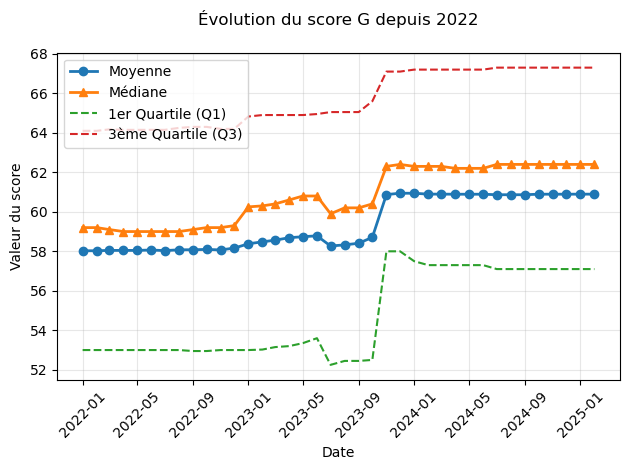

In [37]:
df['period'] = pd.to_datetime(df['period'])  # Conversion explicite en datetime

# 2. Sélection du score
score = input("Quel score analyser ? (E/S/G) ").upper()

# 3. Filtrer les données
df_score = df[df['score_kind'] == score].sort_values('period')

if df_score.empty:
    print(f"Aucune donnée pour le score {score}")
    exit()

# 4. Forcer le début à 2022-01-01 (en Timestamp)
date_debut = pd.to_datetime('2022-01-01')
df_score = df_score[df_score['period'] >= date_debut]  # Comparaison entre Timestamps

# 5. Calcul des statistiques
stats = df_score.groupby('period')['consensus'].agg(
    ['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
)
stats.columns = ['Moyenne', 'Médiane', 'Q1', 'Q3']

# 6. Création du graphique
plt.plot(stats.index, stats['Moyenne'], label='Moyenne', color='#1f77b4', linewidth=2, marker='o')
plt.plot(stats.index, stats['Médiane'], label='Médiane', color='#ff7f0e', linewidth=2, marker='^')
plt.plot(stats.index, stats['Q1'], label='1er Quartile (Q1)', linestyle='--', color='#2ca02c', linewidth=1.5)
plt.plot(stats.index, stats['Q3'], label='3ème Quartile (Q3)', linestyle='--', color='#d62728', linewidth=1.5)

# 7. Personnalisation
plt.title(f'Évolution du score {score} depuis 2022', pad=20)
plt.xlabel('Date')
plt.ylabel('Valeur du score')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# 8. Affichage
plt.show()

In [ ]:
plot_esg_stats("/home/onyxia/work/Statapp_Valuco/ValueCo data extract - ENSAE research project.csv", score_kind='G')

In [ ]:
import pandas as pd

# 1. Lire toutes les feuilles
with pd.ExcelFile("/home/onyxia/work/Statapp_Valuco/ValueCo V2.xlsx") as excel:
    # Afficher les noms des feuilles
    print("Feuilles disponibles:", excel.sheet_names)
    
    # 2. Parcourir chaque feuille
    for sheet_name in excel.sheet_names:
        print(f"\n● Feuille: {sheet_name}")
        
        # Lire la feuille
        df = pd.read_excel(excel, sheet_name=sheet_name)
        
        # Afficher les colonnes
        print("Colonnes:", df.columns.tolist())
        
        # Aperçu des données (optionnel)
        print("Aperçu:")
        print(df.head(2))

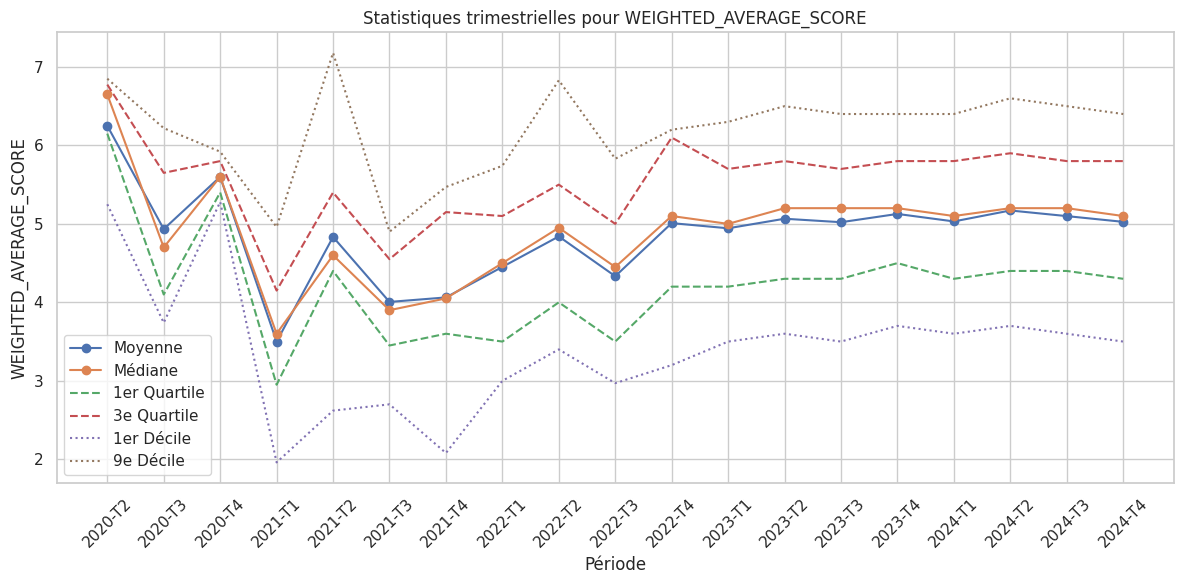

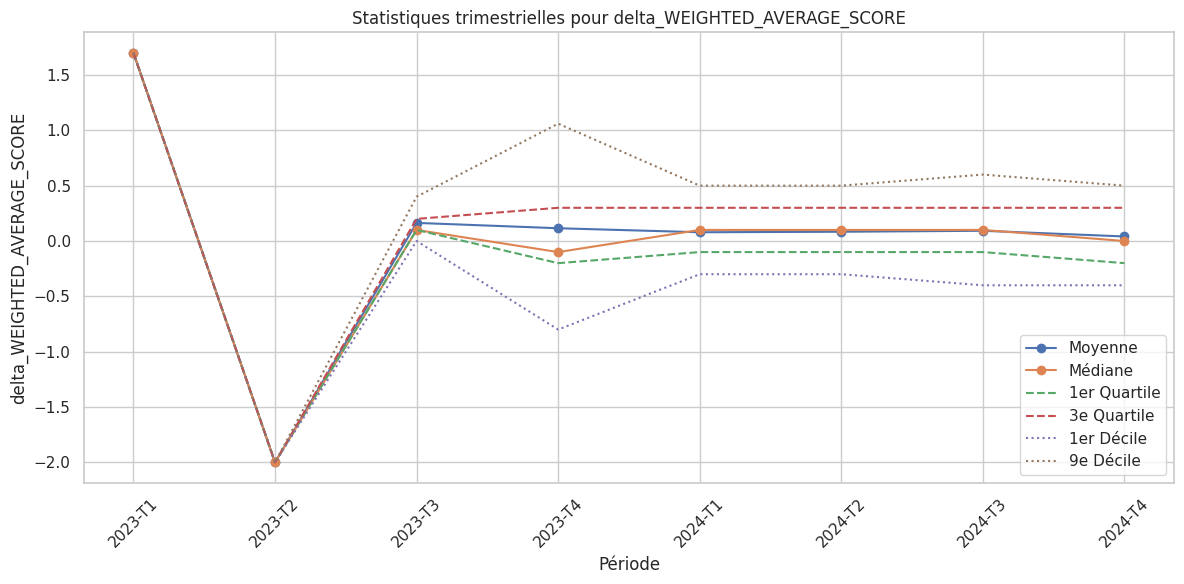

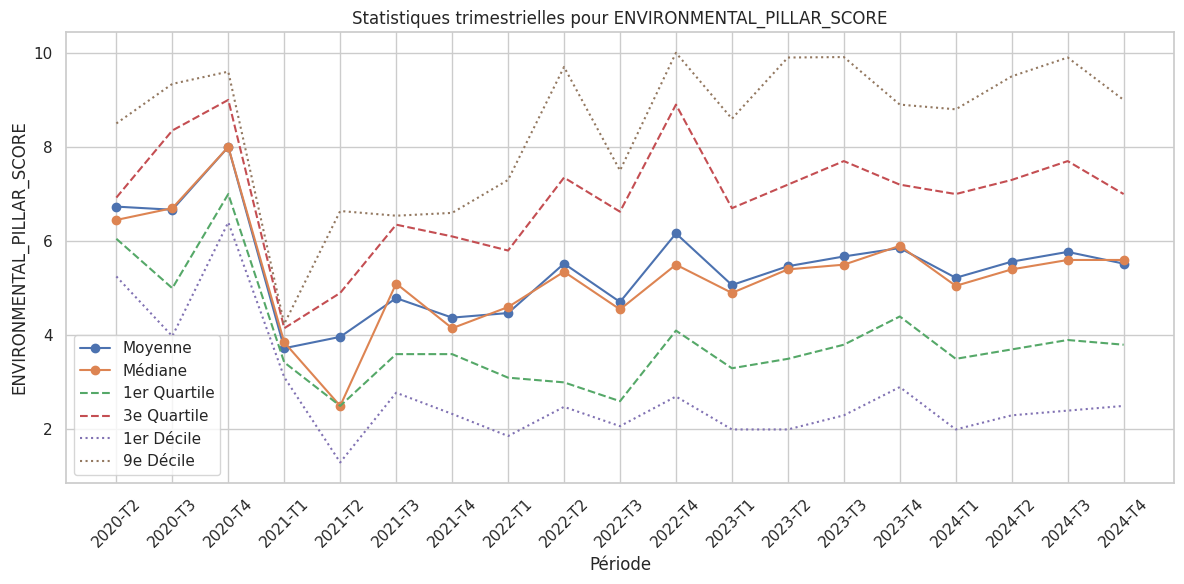

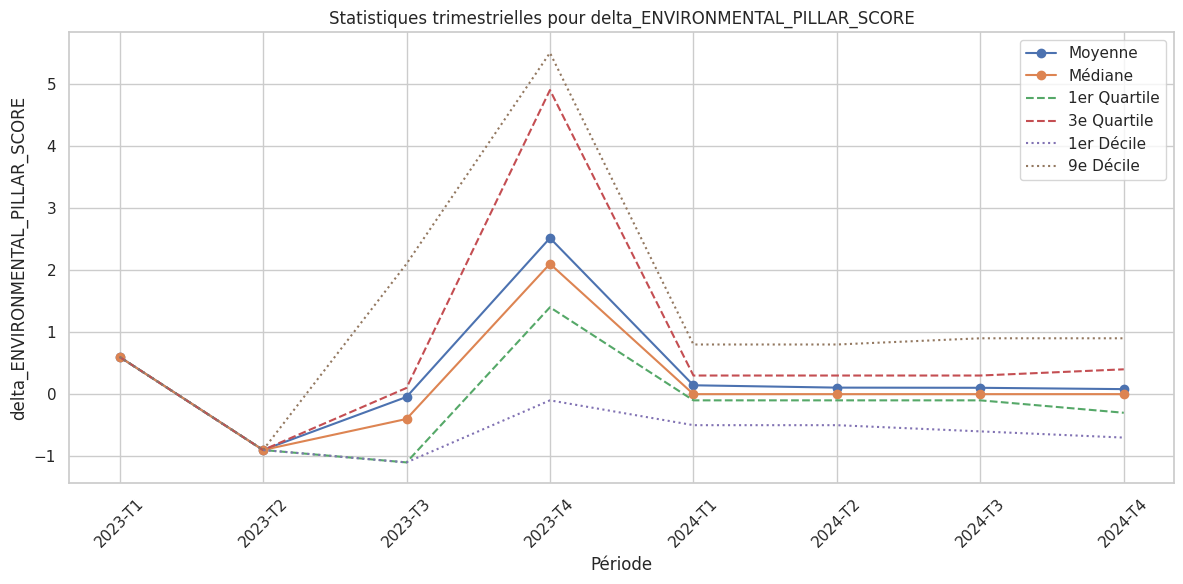

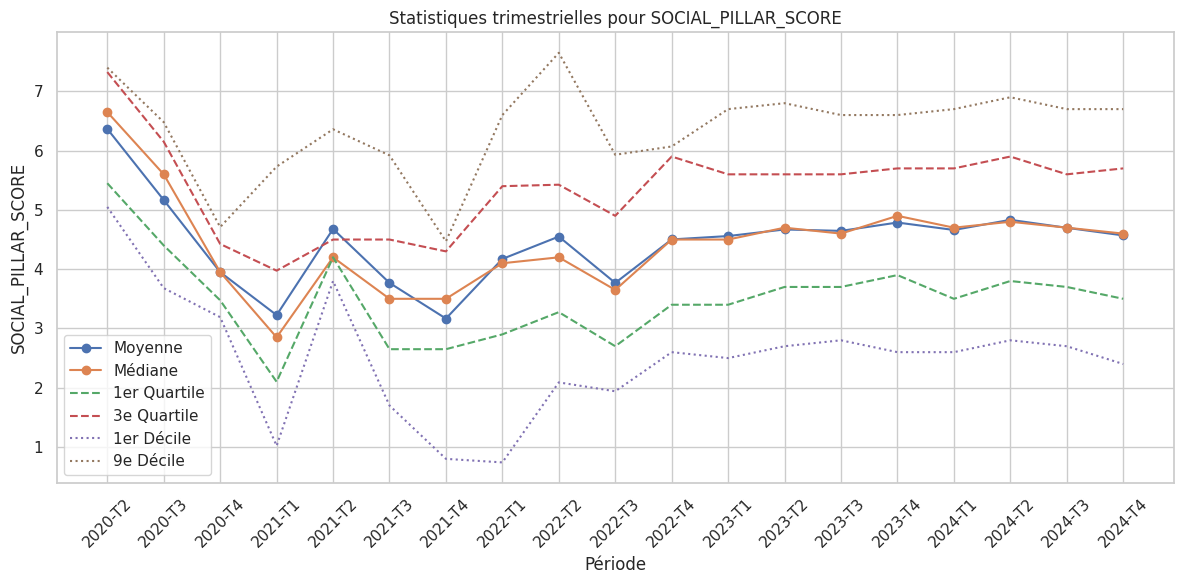

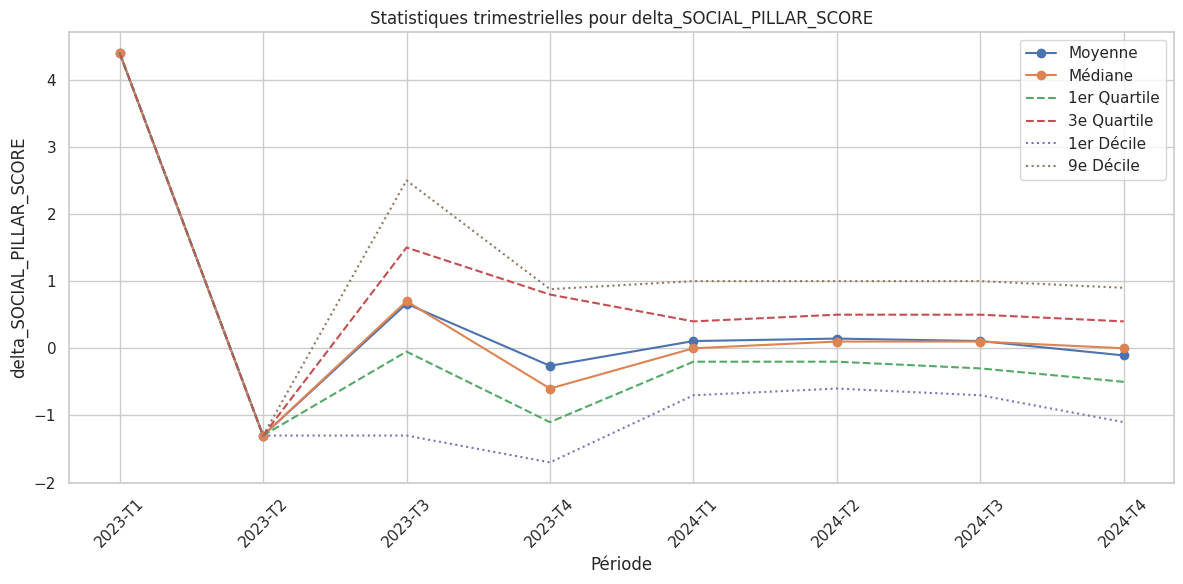

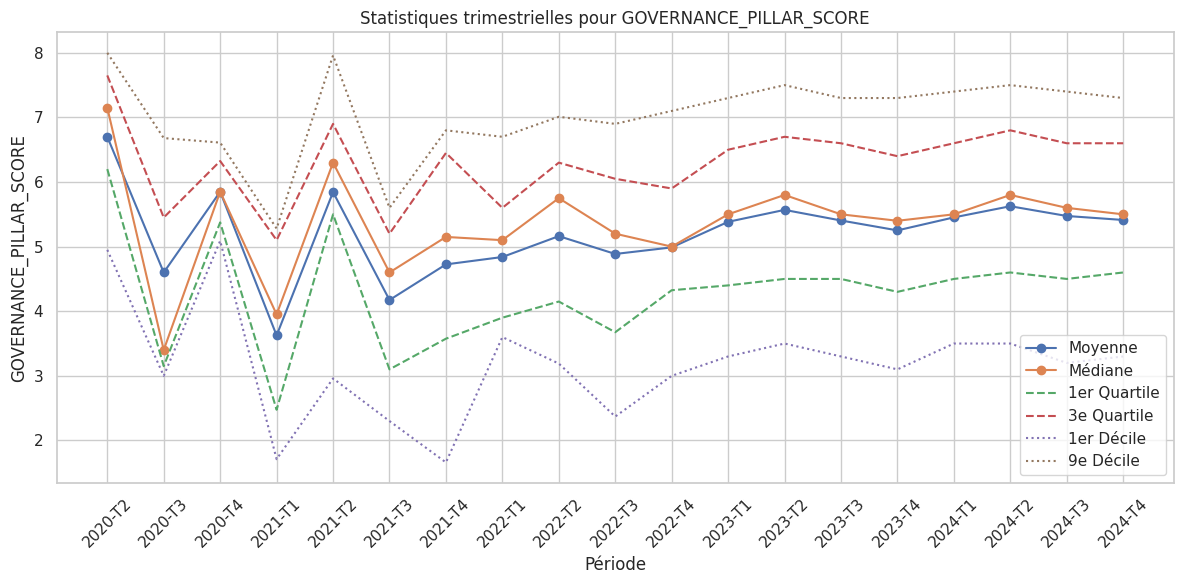

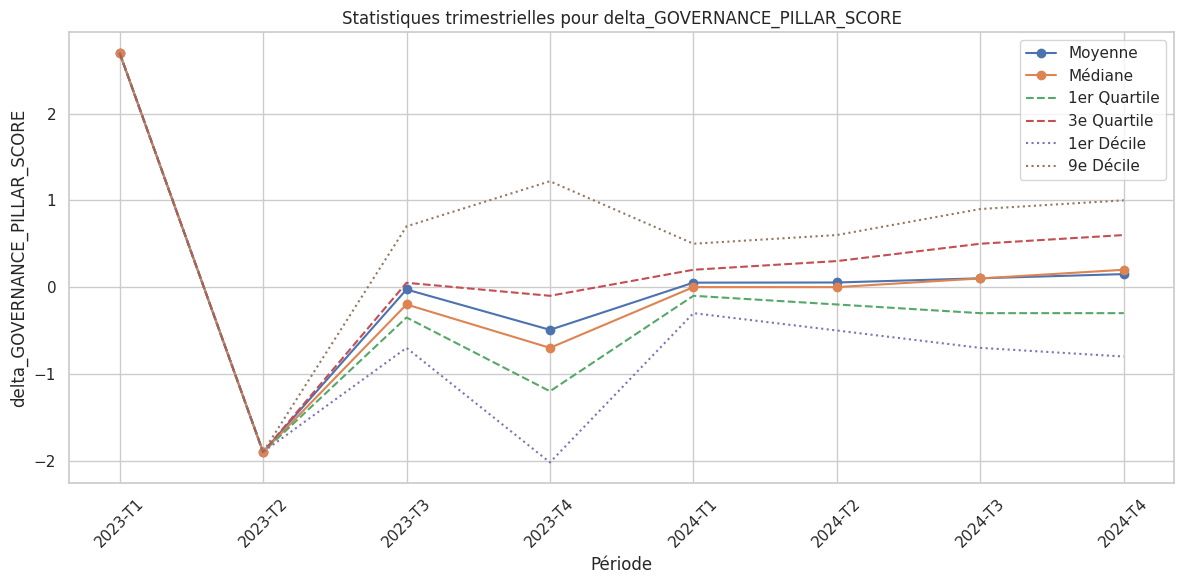

In [3]:
df = pd.read_csv("/home/onyxia/work/Statapp_Valuco/feuilles_separees/MSCI_avec_deltas.csv")

# Créer une colonne période lisible pour l'axe x (par exemple "2021-T1")
df["periode"] = df["ANNEE"].astype(str) + "-T" + df["TRIMESTRE"].astype(str)

# Liste des variables à tracer
variables = [
    "WEIGHTED_AVERAGE_SCORE",
    "delta_WEIGHTED_AVERAGE_SCORE",
    "ENVIRONMENTAL_PILLAR_SCORE",
    "delta_ENVIRONMENTAL_PILLAR_SCORE",
    "SOCIAL_PILLAR_SCORE",
    "delta_SOCIAL_PILLAR_SCORE",
    "GOVERNANCE_PILLAR_SCORE",
    "delta_GOVERNANCE_PILLAR_SCORE"
]

# S'assurer que les périodes sont dans le bon ordre
periode_order = sorted(df["periode"].unique(), key=lambda x: (int(x.split("-")[0]), int(x.split("-T")[1])))

# Configuration de style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Boucle sur chaque variable
for var in variables:
    # Calculer les stats par période
    stats = df.groupby("periode")[var].agg([
        ("moyenne", "mean"),
        ("mediane", "median"),
        ("Q1", lambda x: x.quantile(0.25)),
        ("Q3", lambda x: x.quantile(0.75)),
        ("D1", lambda x: x.quantile(0.10)),
        ("D9", lambda x: x.quantile(0.90))
    ]).reindex(periode_order)

    # Tracer
    plt.figure()
    plt.plot(stats.index, stats["moyenne"], label="Moyenne", marker='o')
    plt.plot(stats.index, stats["mediane"], label="Médiane", marker='o')
    plt.plot(stats.index, stats["Q1"], label="1er Quartile", linestyle="--")
    plt.plot(stats.index, stats["Q3"], label="3e Quartile", linestyle="--")
    plt.plot(stats.index, stats["D1"], label="1er Décile", linestyle=":")
    plt.plot(stats.index, stats["D9"], label="9e Décile", linestyle=":")

    plt.title(f"Statistiques trimestrielles pour {var}")
    plt.xlabel("Période")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
df = pd.read_csv("/home/onyxia/work/Statapp_Valuco/feuilles_separees/Valueco_avec_delta.csv")

# Créer la colonne période
df["periode"] = df["annee"].astype(str) + "-T" + df["trimestre"].astype(str)

# S'assurer que les périodes sont dans le bon ordre
periode_order = sorted(df["periode"].unique(), key=lambda x: (int(x.split("-")[0]), int(x.split("-T")[1])))

# Configuration du style graphique
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Liste des types de score
score_kinds = df["score_kind"].unique()

# Pour chaque score_kind, tracer les stats pour score et delta
for kind in score_kinds:
    for var in ["consensus", "delta"]:
        # Sous-ensemble des données pour ce type
        df_sub = df[df["score_kind"] == kind]

        # Calcul des statistiques par période
        stats = df_sub.groupby("periode")[var].agg([
            ("moyenne", "mean"),
            ("mediane", "median"),
            ("Q1", lambda x: x.quantile(0.25)),
            ("Q3", lambda x: x.quantile(0.75)),
            ("D1", lambda x: x.quantile(0.10)),
            ("D9", lambda x: x.quantile(0.90))
        ]).reindex(periode_order)

        # Tracé
        plt.figure()
        plt.plot(stats.index, stats["moyenne"], label="Moyenne", marker='o')
        plt.plot(stats.index, stats["mediane"], label="Médiane", marker='o')
        plt.plot(stats.index, stats["Q1"], label="1er Quartile", linestyle="--")
        plt.plot(stats.index, stats["Q3"], label="3e Quartile", linestyle="--")
        plt.plot(stats.index, stats["D1"], label="1er Décile", linestyle=":")
        plt.plot(stats.index, stats["D9"], label="9e Décile", linestyle=":")

        plt.title(f"{kind} – Statistiques trimestrielles de '{var}'")
        plt.xlabel("Période")
        plt.ylabel(var)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{kind}_{var}_stats.png")  # Sauvegarde optionnelle
        plt.show()